# Trends in Macroeconomic Data

In [1]:
from fredapi import Fred
fred = Fred(api_key='6c0ecd6565503b64631fd2b36f71293a')
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['figure.figsize'] = (12,6)

GDP = fred.get_series('GDPC1')
C = fred.get_series('PCECC96')
I = fred.get_series('GPDIC1')
G = fred.get_series('GCEC1')
Net_X = fred.get_series('NETEXP') #nominal series
Nom_GDP= fred.get_series('GDP') #nominal series
Exports=Net_X/Nom_GDP


Unrate = fred.get_series('UNRATE')
Unrate = Unrate.resample('3MS').mean()
CD = fred.get_series('PCDG')
CPI = fred.get_series('DDURRG3Q086SBEA')
RCD = CD/CPI*100

C:\Users\samtr\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\samtr\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


### Trimming date range

In [2]:
#Date randge from 1948-1-1 to 2021-10-1
GDP = GDP['1948-1-1':]
C = C['1948-1-1':]
I = I['1948-1-1':]
G = G['1948-1-1':]
Net_X = Net_X['1948-1-1':]
Nom_GDP = Nom_GDP['1948-1-1':]
Exports = Exports['1948-1-1':]
Unrate = Unrate['1948-1-1': '2021-10-1']
RCD = RCD['1948-1-1':]

In [3]:
Y_cycle, Y_trend = sm.tsa.filters.hpfilter(np.log(GDP), 1600)
C_cycle, C_trend = sm.tsa.filters.hpfilter(np.log(C), 1600)
I_cycle, I_trend = sm.tsa.filters.hpfilter(np.log(I), 1600)
G_cycle, G_trend = sm.tsa.filters.hpfilter(np.log(G), 1600)
X_cycle, X_trend = sm.tsa.filters.hpfilter(Exports, 1600)
Unrate_cycle, Unrate_trend = sm.tsa.filters.hpfilter((Unrate), 1600)
RCD_cycle, RCD_trend = sm.tsa.filters.hpfilter(np.log(RCD), 1600)

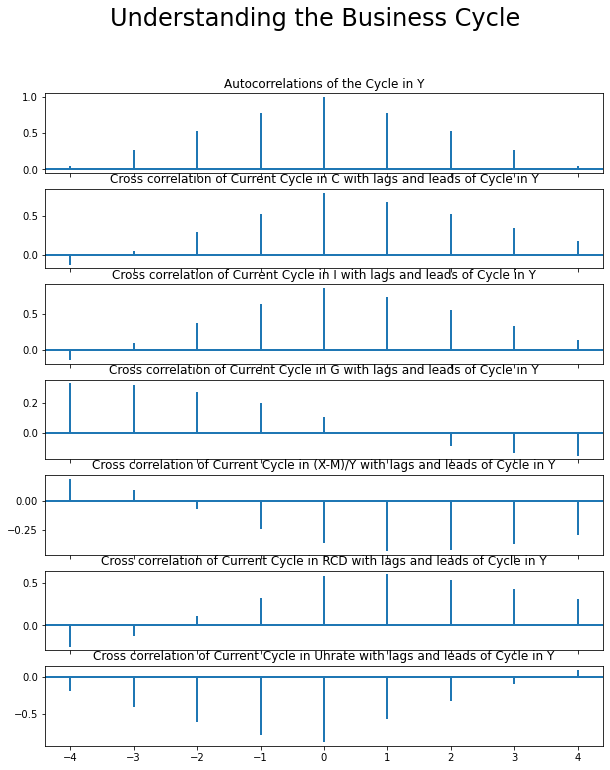

In [4]:
plt.rcParams['figure.figsize'] = (10,12)

fig, [ax1, ax2, ax3, ax4, ax5, ax6, ax7] = plt.subplots(7, 1, sharex=True)
ax2.set_title('Cross correlation of Current Cycle in C with lags and leads of Cycle in Y')
ax2.xcorr(Y_cycle, C_cycle, usevlines=True, maxlags=4, normed=True, lw=2)
#ax1.grid(True)

fig.suptitle('Autocorrelations of Cycle in Y', fontsize=16)
ax1.acorr(Y_cycle, usevlines=True, normed=True, maxlags=4, lw=2)
ax1.set_title('Autocorrelations of the Cycle in Y')

fig.suptitle('Understanding the Business Cycle', fontsize=24)
#ax2.grid(True)

ax3.set_title('Cross correlation of Current Cycle in I with lags and leads of Cycle in Y')
ax3.xcorr(Y_cycle, I_cycle, usevlines=True, maxlags=4, normed=True, lw=2)

ax4.set_title('Cross correlation of Current Cycle in G with lags and leads of Cycle in Y')
ax4.xcorr(Y_cycle, G_cycle, usevlines=True, maxlags=4, normed=True, lw=2)

ax5.set_title('Cross correlation of Current Cycle in (X-M)/Y with lags and leads of Cycle in Y')
ax5.xcorr(Y_cycle, X_cycle, usevlines=True, maxlags=4, normed=True, lw=2)

ax6.set_title('Cross correlation of Current Cycle in RCD with lags and leads of Cycle in Y')
ax6.xcorr(Y_cycle, RCD_cycle, usevlines=True, maxlags=4, normed=True, lw=2)

ax7.set_title('Cross correlation of Current Cycle in Unrate with lags and leads of Cycle in Y')
ax7.xcorr(Y_cycle, Unrate_cycle, usevlines=True, maxlags=4, normed=True, lw=2)

plt.show()

In [5]:
#Create variable for each correlation
ax1 = ax1.acorr(Y_cycle, usevlines=True, normed=True, maxlags=4, lw=2)
ax2 = ax2.xcorr(Y_cycle, C_cycle, usevlines=True, maxlags=4, normed=True, lw=2)
ax3 = ax3.xcorr(Y_cycle, I_cycle, usevlines=True, maxlags=4, normed=True, lw=2)
ax4 = ax4.xcorr(Y_cycle, G_cycle, usevlines=True, maxlags=4, normed=True, lw=2)
ax5 = ax5.xcorr(Y_cycle, X_cycle, usevlines=True, maxlags=4, normed=True, lw=2)
ax6 = ax6.xcorr(Y_cycle, RCD_cycle, usevlines=True, maxlags=4, normed=True, lw=2)
ax7 = ax7.xcorr(Y_cycle, Unrate_cycle, usevlines=True, maxlags=4, normed=True, lw=2)

In [6]:
#Put figures into pandas dataframe
d = np.array([list(ax1[1]), list(ax2[1]), list(ax3[1]), list(ax4[1]), list(ax5[1]), list(ax6[1]), list(ax7[1])])
cols = ('x(t-4)','x(t-3)','x(t-2)','x(t-1)','x(t)','x(t+1)','x(t+2)','x(t+3)','x(t+4)')
indx = ('GDP','Consumption','Investment','Govt','Exports','Consumer Durables','Unemployment Rate')
std = (np.std(ax1[1]), np.std(ax2[1]), np.std(ax3[1]), np.std(ax4[1]), np.std(ax5[1]), np.std(ax6[1]), np.std(ax7[1]))
df = pd.DataFrame(data=d, columns =cols, index=indx )
df.insert(loc=0, column='Standard Deviation', value=std)
df

,Standard Deviation,x(t-4),x(t-3),x(t-2),x(t-1),x(t),x(t+1),x(t+2),x(t+3),x(t+4)
GDP,0.320461,0.040728,0.268010,0.532065,0.774551,1.000000,0.774551,0.532065,0.268010,0.040728
Consumption,0.282199,-0.124284,0.051855,0.294471,0.527855,0.800551,0.676630,0.525554,0.344362,0.178561
Investment,0.306783,-0.137977,0.093762,0.368328,0.636176,0.850457,0.726790,0.554865,0.337783,0.136123
Govt,0.180836,0.325764,0.313018,0.268378,0.196116,0.104096,-0.003995,-0.083183,-0.133525,-0.148770
Exports,0.214934,0.184724,0.093549,-0.073673,-0.243864,-0.362832,-0.430011,-0.422889,-0.364198,-0.295408
Consumer Durables,0.292841,-0.253227,-0.131692,0.109327,0.328607,0.584331,0.604982,0.536663,0.426350,0.311061
Unemployment Rate,0.303399,-0.191640,-0.396595,-0.601193,-0.780613,-0.875078,-0.569718,-0.326363,-0.091011,0.096327


### Omitting observations after 2010...

In [7]:
GDP = fred.get_series('GDPC1')
C = fred.get_series('PCECC96')
I = fred.get_series('GPDIC1')
G = fred.get_series('GCEC1')
Net_X = fred.get_series('NETEXP') #nominal series
Nom_GDP= fred.get_series('GDP') #nominal series
Exports=Net_X/Nom_GDP


Unrate = fred.get_series('UNRATE')
Unrate = Unrate.resample('3MS').mean()
CD = fred.get_series('PCDG')
CPI = fred.get_series('DDURRG3Q086SBEA')
RCD = CD/CPI*100

In [8]:
GDP = GDP['1948-1-1':'2010-10-1']
C = C['1948-1-1':'2010-10-1']
I = I['1948-1-1':'2010-10-1']
G = G['1948-1-1':'2010-10-1']
Net_X = Net_X['1948-1-1':'2010-10-1']
Nom_GDP = Nom_GDP['1948-1-1':'2010-10-1']
Exports = Exports['1948-1-1':'2010-10-1']
Unrate = Unrate['1948-1-1': '2010-10-1']
RCD = RCD['1948-1-1':'2010-10-1']

In [9]:
Y_cycle, Y_trend = sm.tsa.filters.hpfilter(np.log(GDP), 1600)
C_cycle, C_trend = sm.tsa.filters.hpfilter(np.log(C), 1600)
I_cycle, I_trend = sm.tsa.filters.hpfilter(np.log(I), 1600)
G_cycle, G_trend = sm.tsa.filters.hpfilter(np.log(G), 1600)
X_cycle, X_trend = sm.tsa.filters.hpfilter(Exports, 1600)
Unrate_cycle, Unrate_trend = sm.tsa.filters.hpfilter((Unrate), 1600)
RCD_cycle, RCD_trend = sm.tsa.filters.hpfilter(np.log(RCD), 1600)

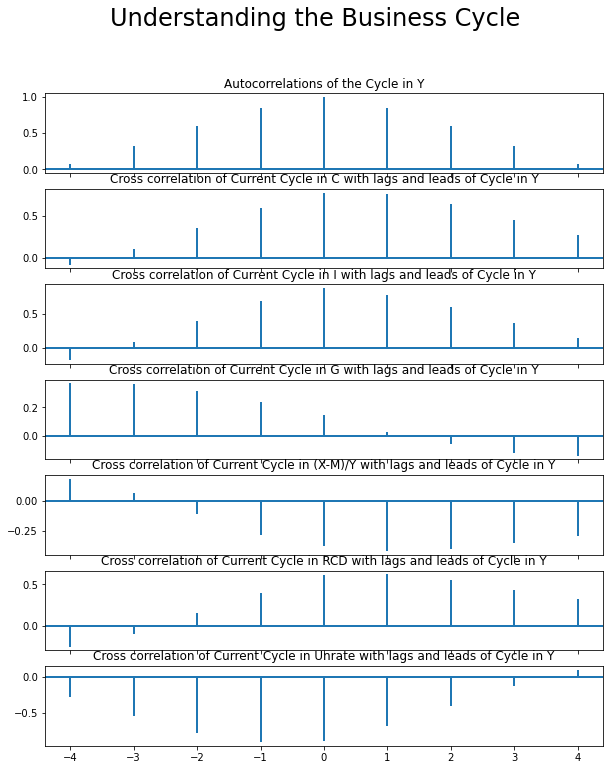

In [10]:
plt.rcParams['figure.figsize'] = (10,12)

fig, [ax1, ax2, ax3, ax4, ax5, ax6, ax7] = plt.subplots(7, 1, sharex=True)
ax2.set_title('Cross correlation of Current Cycle in C with lags and leads of Cycle in Y')
ax2.xcorr(Y_cycle, C_cycle, usevlines=True, maxlags=4, normed=True, lw=2)
#ax1.grid(True)

fig.suptitle('Autocorrelations of Cycle in Y', fontsize=16)
ax1.acorr(Y_cycle, usevlines=True, normed=True, maxlags=4, lw=2)
ax1.set_title('Autocorrelations of the Cycle in Y')

fig.suptitle('Understanding the Business Cycle', fontsize=24)
#ax2.grid(True)

ax3.set_title('Cross correlation of Current Cycle in I with lags and leads of Cycle in Y')
ax3.xcorr(Y_cycle, I_cycle, usevlines=True, maxlags=4, normed=True, lw=2)

ax4.set_title('Cross correlation of Current Cycle in G with lags and leads of Cycle in Y')
ax4.xcorr(Y_cycle, G_cycle, usevlines=True, maxlags=4, normed=True, lw=2)

ax5.set_title('Cross correlation of Current Cycle in (X-M)/Y with lags and leads of Cycle in Y')
ax5.xcorr(Y_cycle, X_cycle, usevlines=True, maxlags=4, normed=True, lw=2)

ax6.set_title('Cross correlation of Current Cycle in RCD with lags and leads of Cycle in Y')
ax6.xcorr(Y_cycle, RCD_cycle, usevlines=True, maxlags=4, normed=True, lw=2)

ax7.set_title('Cross correlation of Current Cycle in Unrate with lags and leads of Cycle in Y')
ax7.xcorr(Y_cycle, Unrate_cycle, usevlines=True, maxlags=4, normed=True, lw=2)

plt.show()

In [11]:
ax1 = ax1.acorr(Y_cycle, usevlines=True, normed=True, maxlags=4, lw=2)
ax2 = ax2.xcorr(Y_cycle, C_cycle, usevlines=True, maxlags=4, normed=True, lw=2)
ax3 = ax3.xcorr(Y_cycle, I_cycle, usevlines=True, maxlags=4, normed=True, lw=2)
ax4 = ax4.xcorr(Y_cycle, G_cycle, usevlines=True, maxlags=4, normed=True, lw=2)
ax5 = ax5.xcorr(Y_cycle, X_cycle, usevlines=True, maxlags=4, normed=True, lw=2)
ax6 = ax6.xcorr(Y_cycle, RCD_cycle, usevlines=True, maxlags=4, normed=True, lw=2)
ax7 = ax7.xcorr(Y_cycle, Unrate_cycle, usevlines=True, maxlags=4, normed=True, lw=2)

In [12]:
d = np.array([list(ax1[1]), list(ax2[1]), list(ax3[1]), list(ax4[1]), list(ax5[1]), list(ax6[1]), list(ax7[1])])
cols = ('x(t-4)','x(t-3)','x(t-2)','x(t-1)','x(t)','x(t+1)','x(t+2)','x(t+3)','x(t+4)')
indx = ('GDP','Consumption','Investment','Govt','Exports','Consumer Durables','Unemployment Rate')
df = pd.DataFrame(data=d, columns =cols, index=indx )
df.insert(loc=0, column='Standard Deviation', value=std)
df

,Standard Deviation,x(t-4),x(t-3),x(t-2),x(t-1),x(t),x(t+1),x(t+2),x(t+3),x(t+4)
GDP,0.320461,0.074957,0.322693,0.603986,0.845380,1.000000,0.845380,0.603986,0.322693,0.074957
Consumption,0.282199,-0.079882,0.105781,0.356417,0.590922,0.770326,0.758857,0.633376,0.449721,0.268759
Investment,0.306783,-0.174837,0.087995,0.397990,0.679070,0.869759,0.772600,0.589745,0.359084,0.142744
Govt,0.180836,0.369716,0.364936,0.315095,0.240170,0.146914,0.026333,-0.062998,-0.122659,-0.143575
Exports,0.214934,0.186968,0.070240,-0.112757,-0.290326,-0.381502,-0.424851,-0.404752,-0.356895,-0.296869
Consumer Durables,0.292841,-0.250382,-0.098733,0.152617,0.396757,0.611925,0.621412,0.551864,0.436091,0.319272
Unemployment Rate,0.303399,-0.279436,-0.539652,-0.771227,-0.904035,-0.886253,-0.683482,-0.402411,-0.125220,0.097730


## Analysis

The first (unsurprising) observation from these charts is the autocorrelation of GDP and how greater lags decrease the correlation with present GDP. In other words, GDP is more correlated at 3 lags than it is at 4 lags, and more corrlated at 2 lags, and so on. Another unsurprising trend from this analysis is the negative correlation between unemployment rate and GDP, as high GDP levels tend to be associated with low levels of unemployment. Somewhat surprising is how past GDP is more strongly correlated with present unemployment than future GDP with unemployment. This trend is likely due to past results from business making decions on whether or not to expand or contract their labor force. The most surpising find is the cross correlation betwen real consumer durables and GDP. Future GDP is more strongly correlated with present real consumer durables than past and even present GDP. This could potentially be the case because consumers are looking toward the future and purchasing durable goods accordingly with an upcoming boom or recession.